In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans, HDBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [2]:
data = pd.read_csv('./Data/OutputDatos.csv')
data.head()

,tconst,titleType,originalTitle,startYear,runtimeMinutes,numVotes,ordering,region,main_genre,secondary_genre
0,103064,movie,Terminator 2: Judgment Day,1991,137,1128166,17,US,Action,Sci-Fi
1,231050,tvSeries,ToransufÃ´mÃ¢: KÃ¢robotto,2000,22,577,16,US,Action,Adventure
2,253474,movie,The Pianist,2002,150,860569,7,US,Biography,Drama
3,369339,movie,Collateral,2004,120,417391,6,US,Action,Crime
4,439547,movie,2 Filhos de Francisco: A HistÃ³ria de ZezÃ© di...,2005,132,5946,5,US,Biography,Drama


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tconst           7462 non-null   int64 
 1   titleType        7462 non-null   object
 2   originalTitle    7462 non-null   object
 3   startYear        7462 non-null   int64 
 4   runtimeMinutes   7462 non-null   int64 
 5   numVotes         7462 non-null   int64 
 6   ordering         7462 non-null   int64 
 7   region           7462 non-null   object
 8   main_genre       7462 non-null   object
 9   secondary_genre  7462 non-null   object
dtypes: int64(5), object(5)
memory usage: 583.1+ KB


In [4]:
data.describe()

,tconst,startYear,runtimeMinutes,numVotes,ordering
count,7.462000e+03,7462.000000,7462.000000,7.462000e+03,7462.00000
mean,4.796526e+06,2013.162557,100.792147,7.288656e+04,16.56312
std,4.832862e+06,6.977416,64.615235,1.641005e+05,12.75775
min,6.904900e+04,1990.000000,3.000000,1.000000e+01,1.00000
25%,9.958298e+05,2008.000000,60.000000,6.265250e+03,6.00000
50%,2.915788e+06,2015.000000,101.000000,1.527900e+04,14.00000
75%,7.639099e+06,2019.000000,122.000000,5.648475e+04,24.00000
max,2.822823e+07,2023.000000,990.000000,2.197234e+06,119.00000


In [5]:
data_objects = data.select_dtypes(include = ['object']).columns
data[data_objects].describe()

,titleType,originalTitle,region,main_genre,secondary_genre
count,7462,7462,7462,7462,7462
unique,4,7284,4,22,26
top,movie,Limitless,IN,Drama,Drama
freq,4676,3,5590,1767,2426


In [6]:
for o  in data_objects:
    le = LabelEncoder()
    le.fit(data[o])
    data[o] = le.transform(data[o])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tconst           7462 non-null   int64
 1   titleType        7462 non-null   int32
 2   originalTitle    7462 non-null   int32
 3   startYear        7462 non-null   int64
 4   runtimeMinutes   7462 non-null   int64
 5   numVotes         7462 non-null   int64
 6   ordering         7462 non-null   int64
 7   region           7462 non-null   int32
 8   main_genre       7462 non-null   int32
 9   secondary_genre  7462 non-null   int32
dtypes: int32(5), int64(5)
memory usage: 437.4 KB


In [8]:
data.describe()

,tconst,titleType,originalTitle,startYear,runtimeMinutes,numVotes,ordering,region,main_genre,secondary_genre
count,7.462000e+03,7462.000000,7462.000000,7462.000000,7462.000000,7.462000e+03,7462.00000,7462.000000,7462.000000,7462.000000
mean,4.796526e+06,1.009113,3647.416376,2013.162557,100.792147,7.288656e+04,16.56312,1.535781,3.989949,8.754623
std,4.832862e+06,1.374387,2106.109039,6.977416,64.615235,1.641005e+05,12.75775,0.865731,2.962262,6.270109
min,6.904900e+04,0.000000,0.000000,1990.000000,3.000000,1.000000e+01,1.00000,0.000000,0.000000,0.000000
25%,9.958298e+05,0.000000,1822.250000,2008.000000,60.000000,6.265250e+03,6.00000,2.000000,1.000000,4.000000
50%,2.915788e+06,0.000000,3647.500000,2015.000000,101.000000,1.527900e+04,14.00000,2.000000,4.000000,6.000000
75%,7.639099e+06,3.000000,5476.750000,2019.000000,122.000000,5.648475e+04,24.00000,2.000000,7.000000,16.000000
max,2.822823e+07,3.000000,7283.000000,2023.000000,990.000000,2.197234e+06,119.00000,3.000000,21.000000,25.000000


In [9]:
data_normalizada = (data - data.min()) / (data.max() - data.min())
data_normalizada

,tconst,titleType,originalTitle,startYear,runtimeMinutes,numVotes,ordering,region,main_genre,secondary_genre
0,0.001208,0.0,0.769463,0.030303,0.135765,0.513446,0.135593,1.0,0.000000,0.76
1,0.005753,1.0,0.910339,0.303030,0.019250,0.000258,0.127119,1.0,0.000000,0.00
2,0.006549,0.0,0.860497,0.363636,0.148936,0.391657,0.050847,1.0,0.142857,0.24
3,0.010664,0.0,0.173280,0.424242,0.118541,0.189958,0.042373,1.0,0.000000,0.16
4,0.013157,0.0,0.004806,0.454545,0.130699,0.002702,0.033898,1.0,0.142857,0.24
...,...,...,...,...,...,...,...,...,...,...
7457,0.345203,0.0,0.931072,0.878788,0.106383,0.001715,0.084746,0.0,0.333333,0.72
7458,0.346099,1.0,0.913909,0.878788,0.022290,0.001506,0.025424,0.0,0.095238,0.12
7459,0.347171,0.0,0.211451,0.878788,0.097264,0.001518,0.237288,0.0,0.333333,0.72
7460,0.347182,0.0,0.270768,0.878788,0.082067,0.001655,0.042373,0.0,0.333333,0.64


In [10]:
hdb = HDBSCAN(min_cluster_size=30)

In [11]:
clustering = hdb.fit_predict(data_normalizada)

In [12]:
clustering

array([-1, -1, -1, ...,  1,  1, -1], dtype=int64)

In [13]:
HDBSCAN_data = data_normalizada.copy()
HDBSCAN_data.loc[:,'Cluster'] = clustering

In [14]:
HDBSCAN_data.Cluster.value_counts().to_frame()

,Cluster
3,2978
2,1907
1,1312
-1,888
0,282
4,95


In [15]:
HDBSCAN_data

,tconst,titleType,originalTitle,startYear,runtimeMinutes,numVotes,ordering,region,main_genre,secondary_genre,Cluster
0,0.001208,0.0,0.769463,0.030303,0.135765,0.513446,0.135593,1.0,0.000000,0.76,-1
1,0.005753,1.0,0.910339,0.303030,0.019250,0.000258,0.127119,1.0,0.000000,0.00,-1
2,0.006549,0.0,0.860497,0.363636,0.148936,0.391657,0.050847,1.0,0.142857,0.24,-1
3,0.010664,0.0,0.173280,0.424242,0.118541,0.189958,0.042373,1.0,0.000000,0.16,-1
4,0.013157,0.0,0.004806,0.454545,0.130699,0.002702,0.033898,1.0,0.142857,0.24,-1
...,...,...,...,...,...,...,...,...,...,...,...
7457,0.345203,0.0,0.931072,0.878788,0.106383,0.001715,0.084746,0.0,0.333333,0.72,1
7458,0.346099,1.0,0.913909,0.878788,0.022290,0.001506,0.025424,0.0,0.095238,0.12,-1
7459,0.347171,0.0,0.211451,0.878788,0.097264,0.001518,0.237288,0.0,0.333333,0.72,1
7460,0.347182,0.0,0.270768,0.878788,0.082067,0.001655,0.042373,0.0,0.333333,0.64,1


In [16]:
HDBSCAN_data.groupby('Cluster').count()

,tconst,titleType,originalTitle,startYear,runtimeMinutes,numVotes,ordering,region,main_genre,secondary_genre
Cluster,,,,,,,,,,
-1,888,888,888,888,888,888,888,888,888,888
0,282,282,282,282,282,282,282,282,282,282
1,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312
2,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907
3,2978,2978,2978,2978,2978,2978,2978,2978,2978,2978
4,95,95,95,95,95,95,95,95,95,95


In [17]:
outliers = HDBSCAN_data[HDBSCAN_data['Cluster']==-1]

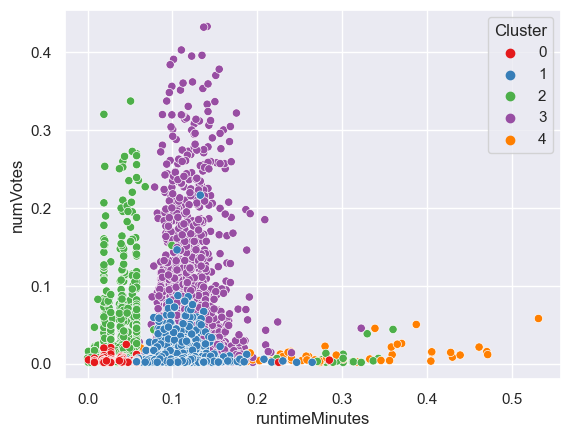

In [18]:
sns.scatterplot(x='runtimeMinutes', y='numVotes',
                data=HDBSCAN_data[HDBSCAN_data['Cluster']!=-1],
                hue='Cluster', palette='Set1', legend='full')
plt.show()


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_normalizada)